In [1]:
import math
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def qsnr(orig, quant):
    """Calculate the QSNR between two tensors
    """
    qerr = orig - quant
    sum_err = np.sum(qerr * qerr)
    sum_orig = np.sum(orig * orig)
    if sum_err > 0:
        if sum_orig < sum_err:
            if sum_orig == 0:
                return -math.inf
            else:
                # Means error is larger than signal
                return -int(round(10 * math.log10(sum_err/sum_orig), 0))
        # Error portion of signal
        return int(round(10 * math.log10(sum_orig/sum_err), 0))
    # Means no error
    return math.inf

def mse(orig, quant, Size):
    mse = 0
    for i in range(Size):
        mse += (orig.real[i] - quant.real[i]) ** 2
        mse += (orig.imag[i] - quant.imag[i]) ** 2
    return mse
    

In [4]:
data, samplerate = sf.read("samples/yes.wav")
frame_size = 1024
frame_step = 160

frame_idx= 0
frame = data[frame_idx*frame_step:frame_idx*frame_step+frame_size]
win_frame = frame * np.hanning(frame_size)

In [133]:
out_window_c = np.array([
		-0.000000, -0.000000, -0.000000, -0.000001, -0.000001, -0.000001, 0.000000, -0.000000, -0.000001, -0.000002, -0.000007, -0.000006, -0.000002, -0.000001, 0.000002, -0.000005, -0.000014, -0.000013, -0.000009, -0.000017, -0.000025, -0.000018, -0.000026, -0.000025, -0.000024, -0.000026, -0.000016, 0.000007, -0.000041, -0.000087, -0.000029, 0.000004, -0.000037, -0.000040, -0.000054, -0.000085, -0.000050, -0.000051, -0.000054, -0.000022, -0.000051, -0.000137, -0.000173, -0.000125, -0.000115, -0.000102, -0.000071, -0.000092, -0.000124, -0.000137, -0.000112, -0.000235, -0.000226, -0.000047, -0.000081, -0.000181, -0.000163, 0.000068, -0.000041, -0.000350, -0.000242, -0.000086, -0.000008, -0.000122, -0.000242, -0.000194, -0.000209, -0.000171, -0.000151, -0.000124, -0.000250, -0.000273, -0.000134, -0.000184, -0.000230, -0.000514, -0.000545, -0.000292, -0.000175, -0.000086, -0.000320, -0.000362, -0.000249, -0.000328, -0.000588, -0.000806, -0.000365, -0.000167, -0.000567, -0.000686, -0.000447, -0.000645, -0.000929, -0.000724, -0.000610, -0.000278, -0.000369, -0.000789, -0.000666, -0.000798, -0.001015, -0.000826, -0.000725, -0.000748, -0.000565, -0.000795, -0.001156, -0.001027, -0.000626, -0.000742, -0.000980, -0.000583, -0.000702, -0.001326, -0.001777, -0.001545, -0.001084, -0.000702, -0.000524, -0.000654, -0.000842, -0.000840, -0.001163, -0.001236, -0.000539, -0.001091, -0.000851, -0.000862, -0.000995, -0.000589, -0.000815, -0.000603, -0.001493, -0.001105, -0.000608, -0.001080, -0.000907, -0.000799, -0.001134, -0.001563, -0.000948, -0.000709, -0.000663, -0.000833, -0.001628, -0.001478, -0.000783, -0.000980, -0.001769, -0.001536, -0.000640, -0.000900, -0.001678, -0.001036, -0.000663, -0.001237, -0.002107, -0.001898, -0.000936, -0.000923, -0.000613, -0.000405, -0.000107, -0.000888, -0.001681, -0.001320, -0.000998, -0.001028, -0.001013, -0.000657, -0.000434, -0.000575, -0.001575, -0.001725, -0.000423, 0.000024, -0.000785, -0.001173, -0.001325, -0.001407, -0.001513, -0.001056, -0.000148, -0.000571, -0.001424, -0.001031, -0.000506, -0.000305, -0.000843, -0.000360, -0.000129, -0.000545, -0.000992, -0.001810, -0.000923, -0.000980, -0.001118, -0.000668, -0.000618, -0.001133, -0.002033, -0.000953, -0.000875, -0.000961, -0.001433, -0.001771, -0.000944, -0.000976, -0.000672, -0.000421, -0.000592, -0.001330, -0.000312, 0.000256, -0.000229, -0.000975, -0.000719, -0.000202, -0.001707, -0.001914, -0.000931, -0.000233, -0.000614, -0.000557, -0.001029, -0.000913, 0.000472, -0.000769, -0.001690, -0.000951, 0.000149, 0.000030, -0.000956, -0.000239, 0.000450, -0.000571, -0.002076, -0.001928, -0.001569, -0.000423, 0.000302, -0.000696, 0.000212, 0.001062, 0.000182, -0.001094, -0.001004, -0.000548, -0.001309, -0.000945, -0.000701, -0.000823, 0.000031, 0.000214, -0.000976, -0.000580, 0.000610, -0.000732, -0.001190, 0.000122, -0.000518, -0.000488, 0.000183, -0.001279, -0.001430, -0.000030, 0.000122, 0.000516, 0.001092, -0.001334, -0.001393, 0.000091, -0.001208, -0.000422, 0.000090, -0.000602, -0.000481, -0.000120, 0.000359, -0.000030, -0.000179, -0.000715, -0.000327, -0.000148, -0.000562, -0.000177, -0.000825, -0.000147, -0.000498, -0.001433, -0.000817, -0.001018, -0.000058, 0.000636, -0.000548, -0.001438, -0.000774, 0.000171, -0.000313, -0.000454, -0.000311, 0.000226, -0.000112, -0.000952, 0.000195, 0.000444, -0.000747, -0.000110, 0.000714, -0.000246, -0.001089, -0.000759, 0.000189, -0.000161, -0.000642, -0.000027, -0.000132, -0.000633, 0.000105, -0.000130, -0.001662, -0.001162, -0.000463, -0.000537, -0.001118, -0.001820, -0.001181, -0.000050, -0.000323, -0.001087, -0.000516, -0.000073, -0.000218, -0.000627, -0.000287, 0.000238, -0.000685, -0.001174, -0.000933, -0.000764, -0.000805, -0.000799, -0.000272, -0.000383, -0.000648, -0.000754, -0.000748, -0.000742, -0.000780, -0.001010, -0.001450, -0.000635, 0.000378, -0.000395, -0.000908, -0.000777, -0.001054, -0.001166, -0.001215, -0.000592, -0.000450, -0.001589, -0.001939, -0.001293, -0.000980, -0.001250, -0.001182, -0.001353, -0.000724, -0.000340, -0.000692, -0.000948, -0.001684, -0.001134, -0.000595, -0.000336, -0.000931, -0.000871, -0.000309, -0.000787, -0.001127, -0.001333, -0.001116, -0.000872, -0.000499, -0.000687, -0.000899, -0.000539, -0.000503, -0.001475, -0.001203, -0.000690, -0.001008, -0.000631, -0.000994, -0.001071, -0.001004, -0.001028, -0.000763, -0.000542, -0.000231, -0.000418, -0.001001, -0.001078, -0.000696, -0.001246, -0.000994, -0.000315, -0.000395, -0.000441, -0.000857, -0.000731, -0.001057, -0.001196, -0.000520, -0.000501, -0.000278, -0.000483, -0.000831, -0.000342, -0.000034, -0.000320, -0.000438, -0.000299, -0.000246, -0.000380, -0.000327, -0.000231, -0.000349, -0.000520, -0.000710, -0.000265, -0.000200, -0.000461, -0.000463, -0.000291, -0.000097, -0.000401, -0.000310, -0.000174, -0.000262, -0.000048, -0.000067, -0.000216, -0.000357, -0.000447, -0.000323, -0.000341, -0.000292, -0.000207, -0.000315, -0.000337, -0.000330, -0.000205, 0.000000, -0.000243, -0.000332, -0.000175, -0.000269, -0.000241, -0.000102, -0.000129, -0.000167, -0.000067, -0.000089, -0.000140, -0.000146, -0.000211, -0.000163, -0.000129, -0.000121, -0.000105, -0.000083, -0.000070, -0.000120, -0.000101, -0.000079, -0.000060, -0.000038, -0.000050, -0.000033, -0.000041, -0.000106, -0.000099, -0.000055, -0.000058, -0.000052, -0.000043, -0.000026, -0.000025, -0.000045, -0.000039, -0.000016, -0.000015, -0.000025, -0.000020, -0.000013, -0.000012, -0.000011, -0.000014, -0.000016, -0.000007, -0.000003, -0.000005, -0.000003, -0.000003, -0.000002, -0.000000, -0.000000, -0.000000, -0.000000, -0.000000, ])

out_swapped_fft = np.array([
	-0.134977-0.134878j, 0.023856+0.048349j, 0.056846+0.032386j, -0.013717-0.001989j, -0.003708-0.014427j, -0.000693+0.000638j, 0.000875+0.006167j, 0.000169+0.000200j, -0.000557+0.003425j, 0.003192-0.002330j, -0.002780-0.005378j, -0.003670+0.000984j, 0.009389+0.002316j, -0.005506+0.002693j, -0.002759-0.005883j, 0.003941+0.004080j, -0.004010+0.002075j, 0.006349-0.004590j, -0.005892+0.001620j, 0.002373+0.001735j, 0.001242-0.001996j, -0.004716+0.000258j, 0.008856-0.001267j, -0.005090-0.000125j, -0.004347+0.004464j, 0.005189-0.002780j, -0.002155-0.000479j, -0.001124-0.002066j, 0.003510-0.003315j, 0.002987+0.014041j, -0.005452-0.010822j, -0.002008+0.003821j, 0.003522-0.002544j, -0.001729+0.001176j, 0.004639+0.002289j, -0.005629-0.005678j, 0.004178+0.006518j, -0.002267-0.005766j, -0.003503+0.006457j, 0.006156-0.008666j, -0.003480+0.010053j, -0.002277-0.009488j, 0.009905+0.006157j, -0.010411-0.004484j, 0.004153+0.007967j, 0.003556-0.008198j, -0.006095+0.002121j, -0.000974+0.000927j, 0.004228+0.000550j, 0.005344-0.001858j, -0.009218+0.001129j, 0.002081+0.001186j, -0.002633-0.000491j, 0.006094-0.002625j, -0.000862+0.000181j, -0.001071+0.006075j, -0.005308-0.006832j, 0.002863+0.005045j, 0.005569-0.004955j, -0.005698+0.001367j, 0.002222+0.000091j, -0.000568+0.006073j, 0.001728-0.011051j, -0.000207+0.000784j, -0.001099+0.007950j, 0.000517+0.004249j, -0.004645-0.008988j, 0.002926+0.000803j, 0.003516+0.000615j, -0.004470+0.001874j, 0.000983+0.001897j, 0.003488-0.009470j, -0.002325+0.009267j, -0.002837-0.005976j, 0.008291+0.007184j, -0.010330-0.006621j, 0.004383+0.003711j, 0.000531-0.003038j, -0.001413-0.001988j, 0.000907+0.007387j, 0.004831-0.006824j, -0.005558+0.004266j, 0.000736-0.000639j, -0.004437+0.000636j, 0.008761-0.000039j, -0.005919+0.003001j, 0.003935-0.006462j, -0.007042+0.004080j, 0.009221-0.004654j, -0.007449+0.002241j, 0.006488-0.000319j, -0.004156+0.007167j, 0.006355-0.011191j, -0.009039+0.009259j, -0.000667-0.007675j, 0.005057+0.006255j, 0.005658-0.008548j, -0.009625+0.007381j, 0.001291-0.001537j, -0.003834-0.000997j, 0.013938-0.001103j, -0.012373+0.004217j, 0.002214+0.000948j, 0.003259-0.004139j, -0.001299+0.003074j, 0.000987-0.008142j, -0.000832+0.013314j, -0.000886-0.010945j, -0.000704-0.000537j, 0.002388+0.008395j, 0.001608-0.007839j, -0.002731+0.003922j, -0.001183-0.000536j, -0.000803+0.005593j, 0.001805-0.003788j, 0.001749-0.007967j, 0.004812+0.012490j, -0.013131-0.016110j, 0.010838+0.010313j, -0.006839+0.007149j, 0.002374-0.009374j, -0.000530+0.007512j, -0.004305-0.011832j, 0.007361+0.009461j, 0.002605-0.003381j, -0.005625-0.006824j, 0.000615+0.017589j, 0.002661-0.012949j, -0.007168-0.011874j, 0.008603+0.022596j, 0.000006-0.007818j, -0.010002+0.001093j, 0.006400+0.000197j, 0.002346+0.004260j, 0.004681-0.021741j, -0.011475+0.018430j, -0.000068+0.001055j, 0.000278-0.006565j, 0.011406+0.011306j, -0.016212-0.013506j, 0.011289+0.009132j, -0.003077-0.012626j, 0.003775+0.017039j, -0.002222-0.009857j, -0.003972+0.002203j, 0.009975-0.006082j, -0.009970+0.008461j, -0.000742-0.003296j, 0.003999-0.006808j, 0.001715+0.010468j, -0.005753-0.002220j, 0.009639-0.000288j, -0.005574-0.002602j, 0.001742-0.004307j, -0.003508+0.012862j, -0.002634-0.016008j, 0.007374+0.011246j, -0.006051+0.004282j, 0.004514-0.009385j, -0.006585+0.003242j, 0.012242-0.001871j, -0.010683-0.002686j, 0.007825+0.004085j, -0.004109+0.002290j, -0.003787+0.001590j, -0.002666+0.000559j, 0.014869-0.011858j, -0.010153+0.008110j, 0.000677-0.001809j, -0.000524+0.000370j, 0.009096+0.001301j, -0.016275-0.001255j, 0.008599-0.001475j, 0.000859+0.007879j, -0.003069-0.007460j, 0.002039+0.003276j, -0.005275-0.006678j, 0.008473+0.013640j, 0.000300-0.018403j, -0.003060+0.016545j, -0.003949-0.003839j, 0.005370-0.004101j, -0.006991+0.000212j, 0.016259+0.000866j, -0.011267-0.003644j, -0.008492+0.006127j, 0.011609+0.002227j, -0.000699-0.006303j, -0.001460-0.000549j, -0.000918+0.005000j, -0.011791-0.005272j, 0.009268+0.002169j, 0.012303+0.005672j, -0.001120-0.006035j, -0.018272+0.001553j, 0.011190-0.009855j, 0.000524+0.014603j, 0.001242-0.009734j, -0.010003+0.006907j, 0.015042-0.000265j, -0.014389-0.001777j, 0.007178-0.000309j, -0.002035-0.001496j, 0.001857+0.001164j, -0.003438-0.001240j, 0.003313+0.006741j, 0.006438-0.014036j, -0.010079+0.010041j, 0.005520+0.000391j, -0.011445+0.002517j, 0.012960-0.011443j, -0.007950+0.005730j, 0.005923+0.005380j, -0.004805-0.004072j, 0.007910-0.000118j, -0.005427+0.000581j, 0.003560-0.006988j, -0.009562+0.013284j, 0.007312-0.003577j, -0.001658-0.006584j, 0.001598+0.005750j, -0.002670-0.004657j, 0.002647+0.003152j, -0.002194-0.001450j, 0.001939+0.002013j, -0.001306-0.002422j, -0.004168+0.001379j, 0.011679-0.004311j, -0.008498+0.004846j, 0.003420-0.000642j, -0.000786+0.000850j, -0.004214+0.004216j, 0.002898-0.007982j, 0.001364-0.003801j, 0.000882+0.011602j, -0.003442-0.007468j, -0.000163+0.001456j, 0.002215+0.003381j, 0.000964-0.006010j, -0.005447+0.006829j, 0.002630-0.005182j, 0.005284+0.004365j, -0.007314-0.001814j, 0.003626-0.007248j, 0.002603+0.010309j, 0.000496-0.003081j, -0.005301-0.003636j, -0.003381+0.002916j, 0.004429+0.000212j, -0.000043-0.000134j, 0.006590+0.000850j, 0.000844-0.000476j, -0.015304-0.004140j, -0.002035-0.014139j, 0.033198+0.058412j, 0.048902+0.023877j, ])

out_rfft = np.array([
	-0.269855+0.000000j, 0.072643+0.024315j, 0.090117-0.025948j, -0.015720+0.012208j, -0.019063-0.010479j, 0.000204+0.001319j, 0.007442+0.005250j, 0.000087+0.000058j, 0.003990+0.003909j, -0.000165-0.005922j, -0.008668-0.001570j, -0.002345+0.004238j, 0.011742-0.008279j, -0.002463+0.009841j, -0.009218-0.003621j, 0.008886-0.000255j, -0.001566+0.007188j, 0.000325-0.011712j, -0.003854+0.007641j, 0.004765-0.001490j, 0.000107-0.002342j, -0.007403+0.005398j, 0.008785-0.011655j, -0.002850+0.005484j, -0.001356+0.010200j, -0.000248-0.008197j, -0.001080-0.000073j, 0.000607+0.001877j, -0.003796-0.009991j, 0.013407+0.011554j, -0.008984-0.003803j, -0.000877+0.003188j, 0.002182-0.002909j, -0.002179+0.001153j, 0.005726-0.002444j, -0.008231+0.002986j, 0.007882-0.003405j, -0.007378+0.003391j, 0.005622+0.009199j, -0.003273-0.019015j, 0.003051+0.010903j, -0.008513-0.004267j, 0.011043+0.000781j, -0.009892+0.004370j, 0.011217-0.001378j, -0.006265-0.011214j, 0.004592+0.017325j, -0.007621-0.006122j, 0.005624+0.000355j, -0.003357-0.014623j, -0.002159+0.017699j, 0.006270-0.004600j, -0.003970+0.000567j, 0.002111-0.003138j, -0.002328+0.000780j, 0.007881+0.004611j, -0.016056-0.003307j, 0.014702+0.005775j, -0.006564-0.012464j, -0.003063+0.010921j, 0.006247-0.012820j, 0.007927+0.013559j, -0.018607-0.010270j, -0.002861+0.004916j, 0.015156+0.001061j, 0.010265+0.001800j, -0.015723+0.000842j, 0.001571-0.005532j, -0.000794-0.001114j, -0.002639+0.006996j, 0.011666+0.001744j, -0.008162-0.010376j, -0.008469+0.001446j, 0.012569+0.004540j, -0.003099-0.004131j, 0.000521+0.007760j, -0.003168+0.001345j, 0.001236-0.016316j, -0.005727+0.017036j, 0.013757-0.009656j, -0.008174+0.002733j, 0.003481-0.000595j, -0.004940+0.005813j, 0.002698-0.005857j, 0.008221+0.001325j, -0.015131-0.001234j, 0.007489-0.000364j, 0.000145+0.001478j, -0.000342-0.000587j, -0.007617-0.008151j, 0.011684+0.013092j, -0.001047+0.000159j, -0.005352-0.004219j, -0.001928-0.000739j, 0.006733-0.002518j, -0.009344-0.000271j, 0.009997+0.002735j, -0.004721-0.002297j, 0.002440+0.009599j, -0.005409-0.004565j, 0.009274-0.012055j, -0.004816+0.017271j, -0.001197-0.013411j, 0.000502+0.003881j, -0.005414+0.001992j, 0.008293+0.001326j, -0.004184+0.001764j, 0.001611-0.010144j, 0.003036+0.007269j, -0.000111+0.003004j, -0.009761-0.009722j, 0.009613+0.007374j, -0.003782-0.002459j, -0.002600+0.009691j, 0.004893-0.016774j, -0.004682+0.012112j, 0.012841-0.008540j, -0.018191+0.013164j, 0.012727-0.011190j, 0.000288+0.006959j, -0.000470-0.001195j, -0.010342-0.018852j, 0.003434+0.022026j, 0.002772-0.004401j, 0.006320-0.000106j, -0.010106-0.001175j, 0.000126+0.007812j, 0.008662-0.022560j, -0.007168+0.011874j, 0.002602+0.012986j, 0.000495-0.017595j, -0.005521+0.006741j, 0.002686+0.003472j, 0.006935-0.009602j, -0.003058+0.012117j, -0.001664-0.007934j, 0.002776+0.009234j, -0.006849-0.006755j, 0.009517-0.010197j, -0.011152+0.015768j, 0.003261-0.011898j, 0.003354+0.007453j, 0.000686+0.004054j, -0.000425-0.005759j, -0.001372+0.000280j, -0.002369-0.002630j, 0.001399+0.006578j, 0.001757-0.008688j, 0.000259+0.000998j, -0.000782+0.011269j, -0.002400-0.013769j, 0.002332+0.009180j, -0.001459-0.003684j, 0.004499+0.003713j, -0.000097-0.001497j, -0.010190-0.002954j, 0.012038+0.000293j, -0.004476+0.000714j, 0.003364+0.001751j, -0.011489-0.006437j, 0.007902+0.009411j, 0.003717-0.009211j, 0.000425+0.009241j, -0.011220-0.007708j, 0.007921+0.008562j, -0.005775-0.006449j, 0.009673+0.001553j, -0.009985-0.002282j, 0.010240+0.002258j, -0.007711-0.002233j, 0.005542+0.007399j, -0.007063-0.005490j, 0.009139-0.000110j, -0.006277+0.001386j, 0.002607-0.001007j, -0.007000-0.001584j, 0.007730+0.002879j, -0.004377-0.003403j, 0.004614+0.000622j, -0.003766+0.003266j, 0.003601-0.006205j, -0.005481+0.010279j, 0.004398-0.011103j, 0.000853+0.011382j, -0.005123-0.011465j, 0.003158+0.005221j, 0.000926+0.002074j, -0.002531-0.001181j, 0.002849-0.002277j, 0.000437-0.001335j, -0.000714+0.004558j, -0.000480-0.000281j, -0.003952-0.001217j, 0.001534-0.001903j, 0.002063+0.002334j, 0.002695-0.002369j, -0.003501+0.001692j, -0.001392-0.000180j, 0.002130-0.000602j, 0.003203+0.000466j, -0.003641+0.001749j, -0.001774-0.001774j, -0.000570-0.000896j, 0.005840+0.000651j, -0.002101-0.000182j, -0.000876+0.000955j, -0.000621+0.002534j, -0.001379-0.002725j, 0.004124+0.000197j, -0.004798-0.004533j, 0.002273+0.003761j, 0.001871+0.002714j, -0.001141-0.003965j, -0.005324+0.004782j, 0.006772-0.005494j, 0.000809+0.005802j, -0.002971-0.006138j, -0.000134+0.002936j, -0.001813-0.000834j, 0.003454+0.002573j, -0.002106-0.004172j, -0.000068+0.004007j, 0.001559-0.001581j, -0.001744-0.001473j, 0.003279+0.001649j, -0.002437-0.003055j, -0.000636+0.008399j, 0.001259-0.006797j, -0.001192-0.001830j, 0.001689+0.003301j, -0.001862+0.001257j, 0.001223-0.001201j, -0.000093-0.002246j, -0.000877+0.001808j, 0.000952+0.001214j, -0.000755-0.002328j, 0.000972+0.001110j, -0.000177+0.000155j, -0.001073+0.000010j, 0.000578-0.000293j, 0.000186-0.000069j, 0.000338+0.000030j, -0.000856+0.000449j, 0.000584-0.000101j, 0.000250-0.000286j, -0.000828+0.000173j, 0.000587+0.000172j, -0.000024-0.000676j, -0.000118+0.000696j, 0.000039-0.000275j, 0.000024-0.000067j, -0.000052+0.000205j, 0.000051-0.000192j, -0.000032+0.000059j, -0.000073+0.000078j, 0.000116-0.000157j, -0.000099+0.000000j, ])


In [134]:
out_rfft[-1]

(-9.9e-05+0j)

In [135]:
np_fft = np.fft.rfft(out_window_c.astype(np.float32))
np_fft[-1]

(-9.899960548409581e-05+0j)

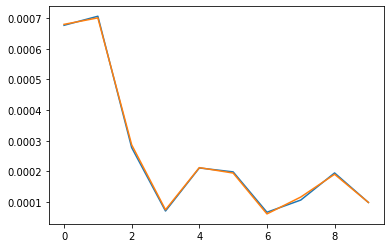

In [132]:
plt.plot(np.abs(out_rfft[-10:]))
plt.plot(np.abs(np_fft[-10:]))

In [179]:
Shift = 5
out_preemph_c = np.array([
		-2272, -2016, -2976, -3712, -3392, -3072, -2848, -3840, -3296, -2752, -3296, -2848, -2176, -2592, -3552, -3008, -2848, -3584, -3904, -2848, -1920, -1888, -1568, -2784, -4000, -2944, -2432, -3840, -4352, -3360, -2784, -3072, -3328, -3072, -2624, -2656, -2016, -2080, -3200, -2656, -4544, -4576, -2752, -3328, -2400, -2720, -3456, -2688, -2400, -3168, -3264, -3296, -3072, -2688, -3168, -2560, -2624, -3168, -3456, -2400, -2080, -3808, -2592, -1440, -2784, -4192, -2880, -2592, -4256, -3264, -3104, -3680, -2656, -3008, -3584, -2944, -3456, -3872, -3264, -3136, -3232, -3552, -3712, -4096, -4160, -2400, -3488, -4736, -3840, -5056, -4608, -3456, -3872, -3136, -3264, -3520, -3712, -5120, -4192, -2688, -4096, -4768, -3616, -4384, -4672, -4448, -4224, -3168, -3456, -2944, -3840, -4448, -3744, -4512, -3712, -3264, -3776, -3584, -2976, -3552, -4000, -3520, -3136, -3840, -4672, -2848, -2048, -3616, -4704, -5408, -5024, -4000, -3712, -2560, -2112, -4128, -4640, -4480, -4608, -3680, -3712, -3680, -3936, -3680, -3456, -3712, -3552, -3520, -3456, -4352, -3296, -2592, -3872, -3584, -4960, -5184, -3584, -3328, -2240, -2560, -3264, -2880, -3744, -4512, -4512, -3040, -2976, -3936, -3680, -2336, -3264, -4192, -2304, -2560, -2752, -3232, -4320, -3648, -2592, -2368, -3808, -5216, -4032, -2560, -2304, -2912, -3776, -3072, -3104, -3840, -2432, -4224, -5408, -4000, -3648, -3776, -4992, -4192, -3232, -3264, -4224, -4256, -3232, -3840, -3456, -2816, -3328, -3616, -3264, -2912, -3360, -3904, -3680, -2080, -2688, -3776, -3296, -2976, -3168, -3296, -3360, -3776, -2688, -2592, -2656, -2752, -3680, -3904, -3232, -2464, -1824, -2624, -3360, -1408, -1824, -3008, -2176, -2176, -3360, -2816, -1504, -2272, -3296, -4032, -3616, -3008, -2336, -1952, -2400, -2720, -2304, -2848, -3328, -1824, -2112, -2656, -2656, -2336, -1792, -2240, -2272, -2944, -2848, -1632, -1344, -2304, -2848, -1664, -1632, -2592, -2080, -1536, -2432, -2720, -1696, -1504, -1888, -1728, -2560, -2912, -3296, -3552, -1920, -1536, -2144, -2720, -1824, -800, -1344, -2816, -3360, -2624, -2624, -2656, -3168, -3520, -3136, -3584, -3360, -1632, -2112, -3264, -3008, -3776, -2848, -2528, -3488, -2720, -2560, -3552, -3168, -2144, -3168, -3456, -3360, -3616, -2720, -2400, -3008, -3360, -3360, -3296, -2976, -2752, -2080, -1984, -3360, -3456, -2240, -1952, -3520, -4992, -3136, -2528, -3392, -2336, -2048, -2368, -2496, -3104, -2720, -2976, -3488, -2528, -3040, -3136, -2336, -2080, -2400, -3808, -3360, -2688, -2912, -2752, -2816, -2336, -2336, -2656, -2752, -3488, -3744, -3104, -2304, -2592, -2816, -2304, -3328, -4672, -3168, -2048, -2976, -3008, -2368, -2272, -2880, -3296, -2208, -2144, -3488, -3104, -3328, -3808, -2784, -2144, -2176, -2784, -3264, -3648, -3776, -2880, -3104, -3104, -2944, -2784, -3072, -3904, -3136, -2432, -3776, -3776, -3392, -3456, -3584, -4032, -3360, -3296, -2816, -2880, -3968, -3744, -2624, -2976, -2560, -2304, -3072, -3008, -3008, -2688, -2112, -2400, -3072, -2304, -2176, -2944, -3360, -3392, -2240, -1472, -2432, -3328, -2208, -1856, -2496, -2240, -2368, -2976, -2976, -2208, -2112, -2144, -2240, -2432, -2592, -1984, -2400, -2816, -1728, -2240, -1760, -1216, -2400, -2720, -3136, -2464, -1888, -3008, -2816, -1600, -1760, -2944, -3008, -1728, -1472, -2176, -2464, -2464, -1952, -1728, -1472, -1472, -1376, -1120, -1184, -1760, -3072, -2720, -1664, -1056, -1568, -3520, -3520, -1696, 0, -576, -2816, -2720, -2112, -1952, -1472, -1984, -2624, -2848, -2400, -1920, -1504, -1440, -2144, -2496, -1280, -1760, -2944, -1728, -864, -2112, -2656, -544, -1024, -2496, -2144, -2080, -2272, -2304, ])

input_frame = np.array([
		-71, -63, -93, -116, -106, -96, -89, -120, -103, -86, -103, -89, -68, -81, -111, -94, -89, -112, -122, -89, -60, -59, -49, -87, -125, -92, -76, -120, -136, -105, -87, -96, -104, -96, -82, -83, -63, -65, -100, -83, -142, -143, -86, -104, -75, -85, -108, -84, -75, -99, -102, -103, -96, -84, -99, -80, -82, -99, -108, -75, -65, -119, -81, -45, -87, -131, -90, -81, -133, -102, -97, -115, -83, -94, -112, -92, -108, -121, -102, -98, -101, -111, -116, -128, -130, -75, -109, -148, -120, -158, -144, -108, -121, -98, -102, -110, -116, -160, -131, -84, -128, -149, -113, -137, -146, -139, -132, -99, -108, -92, -120, -139, -117, -141, -116, -102, -118, -112, -93, -111, -125, -110, -98, -120, -146, -89, -64, -113, -147, -169, -157, -125, -116, -80, -66, -129, -145, -140, -144, -115, -116, -115, -123, -115, -108, -116, -111, -110, -108, -136, -103, -81, -121, -112, -155, -162, -112, -104, -70, -80, -102, -90, -117, -141, -141, -95, -93, -123, -115, -73, -102, -131, -72, -80, -86, -101, -135, -114, -81, -74, -119, -163, -126, -80, -72, -91, -118, -96, -97, -120, -76, -132, -169, -125, -114, -118, -156, -131, -101, -102, -132, -133, -101, -120, -108, -88, -104, -113, -102, -91, -105, -122, -115, -65, -84, -118, -103, -93, -99, -103, -105, -118, -84, -81, -83, -86, -115, -122, -101, -77, -57, -82, -105, -44, -57, -94, -68, -68, -105, -88, -47, -71, -103, -126, -113, -94, -73, -61, -75, -85, -72, -89, -104, -57, -66, -83, -83, -73, -56, -70, -71, -92, -89, -51, -42, -72, -89, -52, -51, -81, -65, -48, -76, -85, -53, -47, -59, -54, -80, -91, -103, -111, -60, -48, -67, -85, -57, -25, -42, -88, -105, -82, -82, -83, -99, -110, -98, -112, -105, -51, -66, -102, -94, -118, -89, -79, -109, -85, -80, -111, -99, -67, -99, -108, -105, -113, -85, -75, -94, -105, -105, -103, -93, -86, -65, -62, -105, -108, -70, -61, -110, -156, -98, -79, -106, -73, -64, -74, -78, -97, -85, -93, -109, -79, -95, -98, -73, -65, -75, -119, -105, -84, -91, -86, -88, -73, -73, -83, -86, -109, -117, -97, -72, -81, -88, -72, -104, -146, -99, -64, -93, -94, -74, -71, -90, -103, -69, -67, -109, -97, -104, -119, -87, -67, -68, -87, -102, -114, -118, -90, -97, -97, -92, -87, -96, -122, -98, -76, -118, -118, -106, -108, -112, -126, -105, -103, -88, -90, -124, -117, -82, -93, -80, -72, -96, -94, -94, -84, -66, -75, -96, -72, -68, -92, -105, -106, -70, -46, -76, -104, -69, -58, -78, -70, -74, -93, -93, -69, -66, -67, -70, -76, -81, -62, -75, -88, -54, -70, -55, -38, -75, -85, -98, -77, -59, -94, -88, -50, -55, -92, -94, -54, -46, -68, -77, -77, -61, -54, -46, -46, -43, -35, -37, -55, -96, -85, -52, -33, -49, -110, -110, -53, 0, -18, -88, -85, -66, -61, -46, -62, -82, -89, -75, -60, -47, -45, -67, -78, -40, -55, -92, -54, -27, -66, -83, -17, -32, -78, -67, -65, -71, -72, ])
out_window_c = np.array([
		0, 0, 0, -1, -2, -3, -4, -7, -8, -8, -12, -13, -12, -16, -26, -25, -27, -39, -48, -39, -29, -31, -28, -55, -86, -69, -62, -105, -128, -106, -94, -110, -127, -125, -113, -121, -97, -106, -171, -150, -269, -285, -179, -227, -171, -203, -269, -218, -203, -279, -299, -314, -303, -275, -336, -282, -299, -373, -421, -302, -270, -511, -359, -205, -409, -635, -449, -415, -701, -553, -540, -658, -487, -566, -692, -583, -701, -805, -695, -683, -721, -810, -866, -977, -1014, -598, -887, -1230, -1018, -1368, -1273, -973, -1112, -918, -974, -1070, -1150, -1615, -1346, -879, -1363, -1614, -1245, -1535, -1663, -1610, -1554, -1184, -1312, -1136, -1504, -1769, -1512, -1849, -1544, -1377, -1616, -1556, -1310, -1585, -1810, -1614, -1457, -1808, -2228, -1376, -1002, -1791, -2359, -2745, -2581, -2080, -1953, -1362, -1137, -2248, -2555, -2494, -2594, -2094, -2134, -2138, -2311, -2183, -2071, -2247, -2171, -2173, -2154, -2738, -2093, -1661, -2505, -2339, -3267, -3444, -2402, -2250, -1527, -1760, -2262, -2012, -2637, -3203, -3229, -2192, -2162, -2881, -2714, -1735, -2442, -3159, -1748, -1956, -2117, -2503, -3367, -2862, -2047, -1882, -3045, -4196, -3263, -2084, -1887, -2398, -3127, -2559, -2599, -3233, -2058, -3594, -4625, -3438, -3151, -3277, -4353, -3673, -2845, -2886, -3751, -3796, -2895, -3454, -3121, -2553, -3029, -3304, -2993, -2680, -3104, -3619, -3423, -1941, -2517, -3547, -3105, -2812, -3002, -3133, -3202, -3609, -2576, -2490, -2558, -2656, -3560, -3785, -3140, -2399, -1780, -2565, -3290, -1381, -1792, -2960, -2145, -2148, -3321, -2787, -1490, -2254, -3273, -4008, -3598, -2995, -2328, -1947, -2395, -2716, -2301, -2846, -3326, -1824, -2112, -2656, -2656, -2336, -1792, -2239, -2270, -2941, -2843, -1629, -1340, -2296, -2836, -1656, -1622, -2574, -2063, -1522, -2407, -2689, -1674, -1482, -1858, -1698, -2511, -2852, -3222, -3465, -1869, -1492, -2079, -2631, -1761, -770, -1291, -2698, -3211, -2501, -2494, -2517, -2994, -3316, -2946, -3356, -3136, -1518, -1958, -3015, -2769, -3463, -2602, -2301, -3162, -2456, -2302, -3181, -2825, -1904, -2801, -3042, -2944, -3153, -2361, -2073, -2585, -2873, -2859, -2790, -2506, -2305, -1732, -1643, -2767, -2830, -1824, -1580, -2832, -3991, -2492, -1996, -2661, -1821, -1586, -1822, -1907, -2355, -2050, -2227, -2591, -1864, -2225, -2278, -1684, -1488, -1704, -2682, -2348, -1863, -2002, -1876, -1904, -1566, -1552, -1749, -1796, -2256, -2400, -1971, -1450, -1615, -1738, -1408, -2014, -2800, -1879, -1202, -1729, -1730, -1347, -1279, -1603, -1815, -1202, -1154, -1856, -1633, -1730, -1957, -1413, -1075, -1078, -1362, -1577, -1740, -1778, -1338, -1423, -1404, -1314, -1225, -1333, -1671, -1323, -1011, -1547, -1525, -1349, -1354, -1382, -1531, -1256, -1212, -1019, -1025, -1389, -1289, -888, -990, -837, -740, -969, -932, -915, -802, -618, -689, -865, -636, -589, -781, -873, -863, -558, -359, -580, -776, -504, -414, -544, -477, -492, -604, -589, -426, -398, -393, -400, -423, -439, -327, -385, -439, -262, -329, -251, -168, -322, -354, -395, -300, -222, -343, -310, -170, -180, -291, -286, -158, -130, -184, -200, -192, -146, -123, -100, -96, -86, -66, -67, -94, -156, -131, -76, -45, -64, -134, -126, -57, 0, -17, -77, -69, -49, -42, -29, -36, -43, -43, -33, -23, -16, -14, -18, -18, -8, -10, -13, -6, -3, -5, -5, -1, -1, -1, -1, 0, 0, 0, ])

out_swapped_fft = np.array([
	-6015-6017j, 2356+3268j, 624+239j, -367-249j, 222+92j, -300-227j, 203+97j, -44+39j, -68-43j, 56+141j, 9-234j, -12+90j, 18+3j, -47+13j, -1-21j, 38-22j, -30+0j, -38+76j, 71-73j, -100-2j, 92+4j, -75-14j, 61+39j, -7-38j, -68-21j, 87+36j, -87-12j, 90+46j, -116-50j, 74-57j, -24+111j, -9-125j, 12+102j, 12-21j, -26-44j, 22+76j, 59-111j, -123+20j, 47+23j, 22+70j, -10-177j, -45+183j, -10-77j, 60-31j, -81+25j, 72+64j, -35-98j, 10-32j, -4+100j, 51-37j, -69+29j, 25-60j, 30+19j, -73+8j, 23-63j, -33+61j, 86-52j, -107+53j, 56+78j, 17-99j, 5-75j, -114+77j, 138+21j, -36-79j, -89+63j, 159-5j, -106-71j, -50+48j, 44+36j, 28+29j, -86-146j, 144+97j, -52+49j, -25-46j, -4+3j, -1-31j, 114+31j, -227-43j, 197+65j, -85-81j, -29+67j, 92-22j, -76-44j, 60+76j, -92-6j, -21-20j, 189-1j, -100+27j, 20-115j, -5+182j, -63-196j, -13+157j, 71-31j, 5-34j, -79+36j, 81+7j, 32-56j, -112-19j, 34+80j, -12-70j, 33+111j, 38-115j, 32+52j, -73-63j, -74+127j, 98-216j, 10+211j, 14-117j, -126+70j, 80-58j, -7+98j, 142-50j, -275-57j, 165+1j, 98+52j, -315-42j, 215+44j, 57+20j, -130-8j, 110-64j, 2+14j, -176+112j, 226-120j, -207-19j, 163+27j, -143+2j, 135+150j, 13-190j, -63+43j, -34+156j, -56-285j, 181+189j, -198-40j, 168+5j, -211+37j, 218-75j, -46+11j, -72+59j, 105+8j, -10-54j, -188-59j, 147+107j, 77-27j, -102-4j, 28-92j, 76+158j, -215-129j, 142+148j, -6-122j, -45-8j, -13+101j, 117-116j, -248+43j, 343-8j, -199-48j, 48+150j, 100-112j, -246+9j, 154+111j, -17-137j, 28+62j, -14+57j, -4-34j, -92-82j, 113+83j, 3-116j, -201+53j, 352+90j, -342-81j, 295-95j, -246+199j, 78-145j, 81+105j, -10-94j, -97+48j, 76+134j, 66-228j, -131+57j, -73+111j, 165-8j, 8-169j, -77+156j, -59-51j, 23-65j, 136+62j, -89+69j, 46-72j, -71+17j, 107-105j, -172+161j, 64-55j, 96+83j, 47-169j, -209-43j, 58+189j, 88-48j, 4+0j, -128-211j, 78+376j, -10-221j, 2-81j, 73+182j, -94+15j, -13-189j, 128+153j, -157-85j, 71+27j, -7+31j, 51-31j, -70+20j, 52+22j, -74-26j, 66-60j, -23+134j, -73-27j, 250-81j, -272-31j, 103+62j, 45+36j, -49-121j, 9+121j, 27-62j, -87-14j, 41+95j, 88-84j, -150+51j, 176-78j, -170+112j, 47-87j, 14+51j, 18-40j, -13+51j, 38-45j, -72-48j, 70+115j, -20-99j, -22+108j, 22-120j, -89+104j, 112-48j, -23-43j, -17+71j, -8-28j, 13-30j, 7+34j, 105-32j, -266+26j, 184+64j, -60-72j, 40-42j, 112+218j, -235-315j, 97+237j, -255-376j, 259+644j, 3307+2390j, ])

out_rfft = np.array([
	-6016+0j, 2832+438j, 438-200j, -311+64j, 160-74j, -268+46j, 155-60j, 0+40j, -60+11j, 115+45j, -126-128j, 41+56j, 15-13j, -11+25j, -16+1j, 15-41j, -24+12j, 32+65j, -6-86j, -43+65j, 37-61j, -48+40j, 70-28j, -45-9j, -16+35j, 31-35j, -23+35j, 43-29j, -37+58j, -33-106j, 64+90j, -71-71j, 36+61j, 33-31j, -49-17j, 16+33j, 14-72j, -58+62j, 35-12j, 69+4j, -148-71j, 108+117j, -52-15j, 20-74j, 7+55j, -12-15j, -1-3j, -29-29j, 33+32j, 1-29j, 31+20j, -90-11j, 87-41j, -49+88j, -46-37j, 73-49j, -17+11j, -47+113j, 122-146j, -111+51j, -13-8j, 32+62j, 73-94j, -115-20j, -6+100j, 65-48j, -2+47j, -43-89j, 36+57j, -22-23j, -21+43j, -6-64j, 75+4j, -9+32j, -35+13j, -16-84j, -12+61j, 56+58j, 0-88j, -68-37j, 5+119j, 53-65j, -49-28j, -6+35j, 46-28j, 14+78j, -86-148j, 125+92j, -185-9j, 196+3j, -113-48j, 5+59j, 60-37j, -57+27j, -5+23j, 0-38j, 14-33j, -27+73j, 92-42j, -126-27j, 48+60j, 25-75j, -97+5j, 161+33j, -111-33j, 33+55j, 14-50j, -31-2j, -8+67j, 74-71j, -109+51j, 42-82j, 4+58j, -51-12j, 38+11j, 74-37j, -95+13j, -7+23j, 50+3j, -37-36j, -23-9j, 108+44j, -109-29j, 82+2j, -101+14j, 91-92j, -30+139j, -19-80j, -32-22j, 5+93j, 66-78j, -74+1j, 81-19j, -104+14j, 113+50j, -90-49j, 0-10j, 53+26j, -66+11j, 27-14j, 105-38j, -160+38j, 46-28j, 79-15j, -130+42j, 64+22j, -4-62j, 34+32j, -59-29j, 13+53j, -17-105j, 71+106j, -53-75j, -28+60j, 11-44j, 15+58j, 16-51j, -6+12j, 1-27j, -41+15j, 15+26j, 30-12j, -39-12j, 11+4j, 30+20j, -12-78j, -20+77j, -26-42j, 21+8j, -31+31j, 54-47j, 13+16j, -54+28j, 28-49j, -41+19j, 30+13j, 11-28j, -42+32j, 60-64j, -89+75j, 71-39j, -25+9j, 1-13j, 6+23j, -34+11j, 30-77j, 0+80j, -1-28j, 36-13j, -71-32j, -21+56j, 59-3j, -17-16j, -11-1j, 24-10j, -48-1j, 15+30j, 53-4j, -58+4j, -14-23j, 60-4j, -55+12j, 9+3j, 4-11j, -11+27j, 22-23j, -32+19j, 19+6j, -12-32j, -2-3j, 8+58j, 9-59j, -17+13j, -4+10j, 9+11j, -8-14j, 5+3j, -8+1j, 9-4j, -29-8j, 19+45j, 7-35j, -11-2j, -8+28j, 13-32j, -11+18j, 11-5j, -16-21j, 0+40j, 8-26j, -15+22j, 4-28j, -1+24j, 4-13j, -7+11j, -1-2j, -4-8j, 2+7j, -5+3j, 3+4j, -5-8j, -6+7j, 8-1j, -8+4j, -4+3j, 4-4j, -6+3j, 4+6j, -5-4j, -3-1j, 0+2j, -1+3j, -3+0j, -2+1j, 1+4j, -3+0j, 4+0j, ])

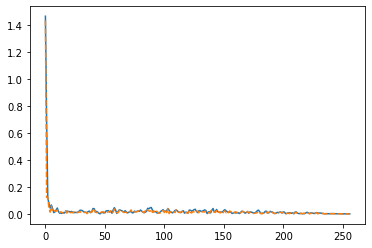

In [180]:
plt.plot(np.abs(out_rfft[:]) * 2**(-15-Shift+int(np.log2(len(input_frame)//2))))
plt.plot(np.abs(np.fft.rfft(out_preemph_c*2**(-15-Shift)))[:], "--")

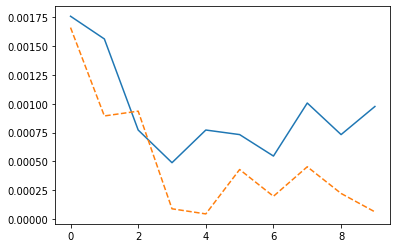

In [181]:
plt.plot(np.abs(out_rfft[-10:]) * 2**(-15-Shift+int(np.log2(len(input_frame)//2))))
plt.plot(np.abs(np.fft.rfft(out_preemph_c*2**(-15-Shift)))[-10:], "--")

In [7]:
out_window_c_f32 = np.array([
		-0.000000, -0.000000, -0.000000, -0.000000, -0.000000, -0.000001, -0.000001, -0.000001, -0.000002, -0.000003, -0.000003, -0.000004, -0.000005, -0.000005, -0.000005, -0.000006, -0.000010, -0.000011, -0.000010, -0.000010, -0.000014, -0.000017, -0.000017, -0.000022, -0.000016, -0.000020, -0.000034, -0.000025, -0.000011, -0.000024, -0.000039, -0.000031, -0.000031, -0.000030, -0.000029, -0.000048, -0.000056, -0.000046, -0.000037, -0.000047, -0.000065, -0.000063, -0.000045, -0.000050, -0.000072, -0.000075, -0.000079, -0.000059, -0.000030, -0.000062, -0.000074, -0.000086, -0.000113, -0.000076, -0.000081, -0.000104, -0.000106, -0.000113, -0.000071, -0.000109, -0.000157, -0.000129, -0.000108, -0.000122, -0.000173, -0.000155, -0.000077, -0.000106, -0.000216, -0.000177, -0.000086, -0.000061, -0.000063, -0.000133, -0.000183, -0.000156, -0.000149, -0.000188, -0.000204, -0.000201, -0.000186, -0.000196, -0.000191, -0.000167, -0.000226, -0.000228, -0.000222, -0.000232, -0.000215, -0.000176, -0.000236, -0.000286, -0.000161, -0.000262, -0.000240, -0.000177, -0.000265, -0.000252, -0.000338, -0.000369, -0.000279, -0.000122, -0.000191, -0.000419, -0.000289, -0.000297, -0.000293, -0.000165, -0.000281, -0.000389, -0.000416, -0.000259, -0.000146, -0.000314, -0.000449, -0.000354, -0.000423, -0.000460, -0.000295, -0.000335, -0.000408, -0.000390, -0.000339, -0.000353, -0.000544, -0.000531, -0.000461, -0.000591, -0.000560, -0.000473, -0.000327, -0.000519, -0.000607, -0.000457, -0.000410, -0.000332, -0.000618, -0.000585, -0.000403, -0.000298, -0.000302, -0.000526, -0.000518, -0.000475, -0.000659, -0.000759, -0.000464, -0.000383, -0.000588, -0.000709, -0.000742, -0.000470, -0.000179, -0.000413, -0.000792, -0.000865, -0.000584, -0.000413, -0.000790, -0.000531, -0.000217, -0.000460, -0.000653, -0.000843, -0.000675, -0.000474, -0.000451, -0.000536, -0.000676, -0.000586, -0.000660, -0.000912, -0.000744, -0.000611, -0.000918, -0.000856, -0.000589, -0.000849, -0.001023, -0.000866, -0.000530, -0.000467, -0.000618, -0.000685, -0.000665, -0.000654, -0.000901, -0.000793, -0.000682, -0.000771, -0.000630, -0.000561, -0.001084, -0.001457, -0.000904, -0.000766, -0.000783, -0.000632, -0.000996, -0.001226, -0.001074, -0.000429, -0.000763, -0.001217, -0.000892, -0.000709, -0.000779, -0.001312, -0.001258, -0.001028, -0.000816, -0.000534, -0.000829, -0.001208, -0.000889, -0.001274, -0.001539, -0.000898, -0.001163, -0.001362, -0.001360, -0.001323, -0.001333, -0.001624, -0.001107, -0.000682, -0.000687, -0.001119, -0.001141, -0.001047, -0.001324, -0.001088, -0.001147, -0.000959, -0.000793, -0.000853, -0.001073, -0.001877, -0.001564, -0.001041, -0.001461, -0.001638, -0.001271, -0.000971, -0.000977, -0.001568, -0.002008, -0.001415, -0.001628, -0.002179, -0.001340, -0.000444, -0.001506, -0.002040, -0.001328, -0.001306, -0.001560, -0.001553, -0.001408, -0.001012, -0.001315, -0.001622, -0.001552, -0.001802, -0.001170, -0.001661, -0.002270, -0.001779, -0.001181, -0.001336, -0.002225, -0.002437, -0.001729, -0.001332, -0.001731, -0.001911, -0.001664, -0.001224, -0.002203, -0.002389, -0.001226, -0.001497, -0.001982, -0.001549, -0.001593, -0.002069, -0.002205, -0.002179, -0.002192, -0.002240, -0.001679, -0.001835, -0.002813, -0.002920, -0.002049, -0.001549, -0.002337, -0.003150, -0.002704, -0.001811, -0.002575, -0.003557, -0.003047, -0.002747, -0.002898, -0.002812, -0.002328, -0.002818, -0.003874, -0.003770, -0.002795, -0.002278, -0.003289, -0.003591, -0.002926, -0.002709, -0.003178, -0.003463, -0.003352, -0.002483, -0.001838, -0.002333, -0.003301, -0.004084, -0.003028, -0.002135, -0.002099, -0.002868, -0.003753, -0.003590, -0.002834, -0.002493, -0.003034, -0.003135, -0.002454, -0.002128, -0.003081, -0.003497, -0.003465, -0.003227, -0.002738, -0.003754, -0.003169, -0.002328, -0.002845, -0.003784, -0.003726, -0.002196, -0.002862, -0.003482, -0.003422, -0.003221, -0.003019, -0.003290, -0.003396, -0.003742, -0.003177, -0.003092, -0.003320, -0.003573, -0.003462, -0.002445, -0.003581, -0.003419, -0.001851, -0.001856, -0.003103, -0.004131, -0.002821, -0.002228, -0.002837, -0.003323, -0.002374, -0.002430, -0.003809, -0.003158, -0.003216, -0.003303, -0.003851, -0.004375, -0.003458, -0.003234, -0.003320, -0.003380, -0.004225, -0.003842, -0.003172, -0.003994, -0.003371, -0.003036, -0.003519, -0.003792, -0.003269, -0.002826, -0.003179, -0.003802, -0.004697, -0.004007, -0.003289, -0.003242, -0.003925, -0.003852, -0.002230, -0.002425, -0.003059, -0.003860, -0.004579, -0.003435, -0.002974, -0.003919, -0.003235, -0.002493, -0.003498, -0.003336, -0.003204, -0.002903, -0.003049, -0.003922, -0.003678, -0.002109, -0.002564, -0.003980, -0.002855, -0.003426, -0.003518, -0.003154, -0.003159, -0.003135, -0.003512, -0.003203, -0.002778, -0.001979, -0.002758, -0.003166, -0.003112, -0.003002, -0.002949, -0.003127, -0.003391, -0.003134, -0.002645, -0.003259, -0.003264, -0.002977, -0.003331, -0.002371, -0.001582, -0.002611, -0.002555, -0.002528, -0.002327, -0.001887, -0.001682, -0.003398, -0.004051, -0.002605, -0.003200, -0.004123, -0.004870, -0.003299, -0.002440, -0.003127, -0.003816, -0.003820, -0.002599, -0.002363, -0.003501, -0.003504, -0.001979, -0.001920, -0.002132, -0.003275, -0.004090, -0.003461, -0.002380, -0.002380, -0.004102, -0.004044, -0.003412, -0.002991, -0.002147, -0.001905, -0.002815, -0.003512, -0.003211, -0.002909, -0.002699, -0.003640, -0.003126, -0.002611, -0.003129, -0.002705, -0.002068, -0.002464, -0.003377, -0.002862, -0.002710, -0.003411, -0.003716, -0.002712, -0.001828, -0.001799, -0.001494, -0.002654, -0.003813, -0.002806, -0.002318, -0.003662, -0.004150, -0.003204, -0.002655, -0.002930, -0.003174, -0.002930, -0.002502, -0.002533, -0.001923, -0.001983, -0.003050, -0.002532, -0.004331, -0.004360, -0.002622, -0.003169, -0.002285, -0.002589, -0.003289, -0.002557, -0.002283, -0.003012, -0.003102, -0.003133, -0.002918, -0.002552, -0.003006, -0.002428, -0.002487, -0.003002, -0.003273, -0.002272, -0.001968, -0.003601, -0.002450, -0.001361, -0.002628, -0.003955, -0.002716, -0.002443, -0.004007, -0.003072, -0.002920, -0.003458, -0.002493, -0.002823, -0.003360, -0.002758, -0.003235, -0.003621, -0.003051, -0.002928, -0.003014, -0.003310, -0.003455, -0.003809, -0.003864, -0.002227, -0.003233, -0.004386, -0.003552, -0.004672, -0.004255, -0.003187, -0.003567, -0.002886, -0.002999, -0.003231, -0.003403, -0.004687, -0.003834, -0.002455, -0.003736, -0.004342, -0.003288, -0.003983, -0.004237, -0.004029, -0.003822, -0.002862, -0.003118, -0.002651, -0.003453, -0.003993, -0.003356, -0.004038, -0.003317, -0.002912, -0.003363, -0.003188, -0.002642, -0.003149, -0.003539, -0.003110, -0.002766, -0.003381, -0.004105, -0.002499, -0.001793, -0.003161, -0.004103, -0.004709, -0.004365, -0.003470, -0.003213, -0.002212, -0.001821, -0.003552, -0.003984, -0.003838, -0.003942, -0.003141, -0.003161, -0.003127, -0.003337, -0.003113, -0.002918, -0.003127, -0.002985, -0.002952, -0.002892, -0.003634, -0.002746, -0.002153, -0.003209, -0.002963, -0.004092, -0.004267, -0.002943, -0.002726, -0.001829, -0.002086, -0.002652, -0.002335, -0.003027, -0.003639, -0.003629, -0.002439, -0.002381, -0.003140, -0.002929, -0.001854, -0.002582, -0.003309, -0.001813, -0.002009, -0.002153, -0.002521, -0.003359, -0.002830, -0.002005, -0.001826, -0.002927, -0.003998, -0.003081, -0.001951, -0.001750, -0.002205, -0.002850, -0.002310, -0.002327, -0.002870, -0.001812, -0.003138, -0.004002, -0.002950, -0.002682, -0.002768, -0.003645, -0.003050, -0.002345, -0.002359, -0.003043, -0.003054, -0.002312, -0.002738, -0.002454, -0.001993, -0.002346, -0.002542, -0.002285, -0.002030, -0.002334, -0.002702, -0.002537, -0.001428, -0.001839, -0.002575, -0.002238, -0.002012, -0.002135, -0.002212, -0.002245, -0.002513, -0.001782, -0.001712, -0.001746, -0.001802, -0.002399, -0.002534, -0.002089, -0.001587, -0.001170, -0.001675, -0.002136, -0.000891, -0.001149, -0.001887, -0.001359, -0.001353, -0.002080, -0.001735, -0.000922, -0.001387, -0.002002, -0.002439, -0.002177, -0.001803, -0.001393, -0.001159, -0.001417, -0.001598, -0.001348, -0.001658, -0.001928, -0.001052, -0.001212, -0.001516, -0.001507, -0.001320, -0.001007, -0.001253, -0.001264, -0.001628, -0.001567, -0.000893, -0.000732, -0.001249, -0.001535, -0.000892, -0.000870, -0.001374, -0.001096, -0.000806, -0.001269, -0.001411, -0.000874, -0.000771, -0.000963, -0.000875, -0.001290, -0.001459, -0.001642, -0.001758, -0.000945, -0.000751, -0.001043, -0.001315, -0.000877, -0.000382, -0.000638, -0.001328, -0.001575, -0.001222, -0.001215, -0.001222, -0.001448, -0.001599, -0.001415, -0.001606, -0.001496, -0.000722, -0.000929, -0.001425, -0.001305, -0.001627, -0.001219, -0.001074, -0.001472, -0.001140, -0.001066, -0.001468, -0.001300, -0.000873, -0.001282, -0.001388, -0.001340, -0.001432, -0.001069, -0.000937, -0.001165, -0.001291, -0.001282, -0.001249, -0.001118, -0.001026, -0.000770, -0.000728, -0.001224, -0.001250, -0.000804, -0.000695, -0.001242, -0.001748, -0.001090, -0.000871, -0.001159, -0.000792, -0.000688, -0.000790, -0.000825, -0.001018, -0.000884, -0.000959, -0.001114, -0.000800, -0.000955, -0.000976, -0.000721, -0.000636, -0.000727, -0.001144, -0.001000, -0.000792, -0.000851, -0.000797, -0.000808, -0.000664, -0.000658, -0.000740, -0.000760, -0.000953, -0.001014, -0.000832, -0.000611, -0.000681, -0.000733, -0.000594, -0.000849, -0.001179, -0.000792, -0.000506, -0.000728, -0.000729, -0.000567, -0.000539, -0.000676, -0.000765, -0.000507, -0.000487, -0.000783, -0.000689, -0.000731, -0.000827, -0.000598, -0.000455, -0.000457, -0.000577, -0.000669, -0.000739, -0.000756, -0.000570, -0.000607, -0.000599, -0.000562, -0.000525, -0.000572, -0.000717, -0.000569, -0.000436, -0.000668, -0.000659, -0.000585, -0.000588, -0.000602, -0.000668, -0.000549, -0.000532, -0.000448, -0.000452, -0.000614, -0.000571, -0.000395, -0.000441, -0.000374, -0.000332, -0.000436, -0.000421, -0.000415, -0.000365, -0.000283, -0.000316, -0.000398, -0.000294, -0.000274, -0.000364, -0.000409, -0.000406, -0.000264, -0.000171, -0.000277, -0.000373, -0.000244, -0.000201, -0.000266, -0.000235, -0.000244, -0.000301, -0.000295, -0.000215, -0.000202, -0.000202, -0.000207, -0.000220, -0.000230, -0.000173, -0.000205, -0.000236, -0.000142, -0.000180, -0.000139, -0.000094, -0.000182, -0.000202, -0.000228, -0.000175, -0.000131, -0.000205, -0.000187, -0.000104, -0.000112, -0.000183, -0.000182, -0.000102, -0.000085, -0.000123, -0.000136, -0.000132, -0.000102, -0.000088, -0.000073, -0.000071, -0.000065, -0.000051, -0.000053, -0.000076, -0.000130, -0.000111, -0.000066, -0.000041, -0.000059, -0.000128, -0.000124, -0.000058, 0.000000, -0.000018, -0.000087, -0.000081, -0.000061, -0.000055, -0.000040, -0.000052, -0.000066, -0.000069, -0.000056, -0.000043, -0.000032, -0.000030, -0.000042, -0.000047, -0.000023, -0.000030, -0.000049, -0.000027, -0.000013, -0.000030, -0.000036, -0.000007, -0.000013, -0.000029, -0.000024, -0.000022, -0.000022, -0.000021, -0.000013, -0.000012, -0.000023, -0.000015, -0.000009, -0.000015, -0.000011, -0.000013, -0.000013, -0.000010, -0.000009, -0.000008, -0.000005, -0.000004, -0.000006, -0.000005, -0.000003, -0.000004, -0.000004, -0.000003, -0.000001, -0.000001, -0.000002, -0.000002, -0.000001, -0.000001, -0.000001, -0.000000, -0.000000, -0.000000, -0.000000, -0.000000, ])

out_swapped_fft_f32 = np.array([
	-0.824793-0.824867j, 0.391543+0.478543j, 0.017654-0.028644j, -0.026875-0.069452j, 0.006492+0.092296j, -0.004132-0.033142j, 0.003574-0.009892j, -0.005204-0.000275j, 0.008398+0.015573j, -0.011765-0.010668j, 0.013818-0.018507j, -0.010446+0.029454j, 0.012445-0.004922j, -0.010682-0.010215j, -0.000194+0.006616j, 0.006286-0.002330j, -0.001769-0.004179j, 0.000339+0.006580j, -0.010121-0.006072j, 0.021462+0.005531j, -0.016708+0.001582j, -0.000034-0.006060j, 0.003486+0.007704j, 0.006974-0.008025j, -0.011364-0.002564j, 0.005659+0.008763j, 0.003186-0.005590j, -0.008744+0.002503j, 0.006968+0.003658j, -0.001476-0.006439j, -0.003152+0.002077j, 0.005622+0.002403j, -0.002366-0.000228j, 0.002630-0.004761j, -0.004232+0.006871j, -0.002415-0.007012j, 0.004631+0.004322j, 0.001575-0.001104j, -0.010883-0.004713j, 0.010945+0.008681j, -0.000150-0.005571j, -0.003896+0.004696j, 0.003474-0.009492j, -0.005580+0.006652j, 0.001264+0.004028j, 0.001804-0.002840j, 0.006704-0.001823j, -0.012939-0.001998j, 0.014019+0.004014j, -0.011359-0.004038j, 0.002525+0.007779j, 0.004788-0.012423j, -0.005615+0.007447j, 0.004919+0.000919j, -0.008391-0.006006j, 0.011808+0.006995j, -0.006572-0.002462j, -0.001068+0.003724j, -0.001043-0.005094j, 0.002408+0.001166j, 0.004136-0.001863j, -0.007306+0.005786j, 0.001662-0.006288j, -0.000173+0.003040j, 0.011157+0.000784j, -0.015710-0.006121j, 0.009063+0.006180j, -0.008989-0.002353j, 0.007020+0.004926j, 0.001945-0.004176j, 0.000955+0.001002j, -0.010205-0.003793j, 0.013370+0.002449j, -0.012667+0.006420j, 0.008715-0.010589j, -0.001332+0.006840j, -0.005303-0.005076j, 0.003078+0.009319j, 0.001340-0.007979j, -0.002251-0.002054j, 0.007572+0.007220j, -0.012839-0.000628j, 0.011439-0.012038j, -0.007071+0.011543j, 0.007025-0.003533j, -0.009028+0.001512j, 0.002587+0.003289j, 0.002047-0.003663j, 0.003416+0.000077j, -0.008271+0.004540j, 0.011276-0.010198j, -0.009347+0.010931j, 0.004542-0.006220j, -0.004198-0.001881j, 0.001303+0.003350j, 0.002004-0.004740j, 0.003075+0.006652j, -0.007348-0.003452j, 0.009022-0.001092j, -0.010830+0.003160j, 0.006858+0.001286j, -0.008445-0.003530j, 0.013266+0.005211j, -0.007136-0.009433j, -0.001402+0.010178j, 0.005190-0.002404j, -0.004312-0.009417j, -0.000102+0.008173j, 0.002776-0.003983j, -0.004697+0.008284j, 0.003181-0.005768j, 0.005240+0.002507j, -0.007907-0.003288j, 0.000407+0.003940j, 0.005147-0.009476j, -0.001719+0.011860j, -0.004554-0.014469j, 0.009265+0.013943j, -0.012129-0.006332j, 0.009108+0.004413j, -0.005894+0.002071j, 0.007266-0.011132j, -0.003517+0.007349j, -0.006754+0.000026j, 0.008261-0.005069j, -0.000583+0.006162j, -0.007273-0.003789j, 0.010713+0.003541j, -0.006493+0.000366j, 0.000370-0.004123j, 0.004377-0.001786j, -0.005065+0.012288j, 0.001497-0.010295j, 0.010345+0.000046j, -0.024602-0.002621j, 0.023812+0.010527j, -0.011659-0.010876j, 0.001665+0.003558j, -0.000901+0.003991j, 0.000744-0.007843j, 0.002689+0.004432j, 0.002984+0.003340j, -0.014160+0.001332j, 0.013937-0.003425j, -0.011573-0.005733j, 0.010234+0.006492j, -0.004493-0.003889j, 0.001370+0.005362j, 0.002391-0.000952j, 0.003432-0.003525j, -0.008860-0.001373j, 0.002747+0.003320j, -0.005918-0.003454j, 0.013561+0.002270j, -0.008010+0.005021j, -0.006723-0.003135j, 0.010498-0.004682j, -0.000384+0.009382j, -0.001071-0.008701j, -0.004141-0.002419j, 0.003867+0.011318j, -0.003478-0.013038j, 0.002073+0.007998j, 0.000548+0.000327j, -0.004239-0.000633j, 0.011604-0.002373j, -0.012787+0.001038j, 0.002528+0.004108j, -0.000618-0.002189j, 0.008446-0.003051j, -0.005205-0.000363j, 0.001770-0.006075j, -0.005469+0.022631j, 0.002594-0.022147j, -0.003445+0.012589j, 0.006347-0.008553j, -0.002054+0.008642j, -0.003108-0.002025j, 0.005144-0.009081j, -0.001752+0.002934j, 0.005619+0.009518j, -0.011787-0.008749j, 0.010692-0.003999j, -0.009435+0.013225j, 0.005406-0.013688j, -0.006127+0.014172j, 0.011231-0.007037j, -0.007444-0.003105j, 0.004884+0.004037j, -0.014086-0.000794j, 0.016767+0.004136j, -0.004738-0.004739j, -0.002394-0.003496j, 0.006613+0.005706j, -0.011860-0.005142j, 0.009032-0.001146j, -0.006255+0.008431j, 0.003744-0.007742j, -0.000953+0.006843j, 0.009000-0.009138j, -0.014887+0.008024j, 0.003567-0.002992j, 0.013694+0.005719j, -0.013449-0.009908j, 0.003485+0.007886j, -0.009551-0.002475j, 0.021329+0.001343j, -0.018883-0.006521j, 0.005779+0.001451j, 0.002437+0.003411j, -0.003768+0.008851j, -0.004434-0.003282j, 0.014081-0.011179j, -0.009797-0.001744j, -0.000898+0.011789j, -0.001945-0.012361j, 0.007929+0.016796j, -0.005688-0.006037j, 0.007070-0.001913j, -0.007579-0.006366j, 0.007651+0.007016j, -0.006355-0.000769j, 0.000900-0.003743j, 0.014780+0.007240j, -0.028414-0.007667j, 0.013665+0.000814j, 0.001527+0.003496j, 0.004237-0.001968j, -0.003961+0.002789j, 0.003895+0.003281j, -0.022700-0.008045j, 0.039194+0.001628j, -0.027175-0.005143j, 0.000442+0.009492j, 0.009207+0.009753j, 0.000306-0.020600j, -0.012035+0.000753j, 0.004663+0.013599j, 0.012623+0.003617j, -0.008663-0.018170j, -0.000120+0.006630j, -0.008877-0.004647j, 0.009941+0.003396j, 0.004849+0.004946j, -0.018973+0.001071j, 0.017054-0.003647j, 0.003134+0.000643j, -0.020288+0.000297j, 0.017121+0.003731j, -0.002267-0.014817j, -0.003794+0.013972j, -0.004691-0.000754j, 0.018786-0.008001j, -0.012347+0.011201j, -0.006200-0.015477j, 0.010968+0.018773j, -0.001098-0.011988j, -0.005049-0.000640j, 0.000595+0.012913j, -0.002547-0.010684j, -0.000579-0.010062j, 0.004318+0.006935j, -0.001200+0.018160j, 0.004938-0.015304j, -0.014311+0.002447j, 0.030010-0.006386j, -0.037230-0.005725j, 0.010305+0.031591j, 0.017220-0.026292j, -0.001821+0.000587j, -0.011302+0.013552j, 0.005923-0.011241j, -0.003459+0.003902j, 0.004653-0.005164j, -0.012310-0.009399j, 0.000776+0.027995j, 0.015287-0.010662j, -0.003545-0.017708j, -0.013599+0.022624j, 0.017215-0.014910j, -0.006647+0.012695j, -0.014168-0.012004j, 0.009919+0.013381j, 0.013576-0.003379j, -0.015543-0.015114j, 0.016401+0.018514j, -0.015149-0.019264j, 0.001344+0.014934j, -0.004332-0.008571j, 0.013128+0.006985j, -0.009849-0.003328j, 0.005911+0.016065j, -0.008407-0.027089j, 0.004099+0.012675j, 0.005456+0.005918j, -0.010962-0.012709j, 0.009082+0.005440j, -0.010416+0.005369j, 0.017447+0.002487j, -0.002271-0.015359j, -0.017875+0.011945j, 0.022962-0.006530j, -0.016517+0.008397j, 0.007698+0.000202j, 0.005977-0.013301j, 0.002324+0.009484j, -0.035400-0.005106j, 0.026437+0.010126j, 0.002603-0.011896j, -0.013669+0.009632j, 0.010783-0.012420j, 0.002060+0.015976j, -0.006291-0.019607j, -0.004034+0.013463j, 0.023981+0.010936j, -0.026145-0.027656j, 0.009709+0.012743j, -0.006223+0.010427j, 0.007636-0.013512j, -0.008768+0.004081j, 0.009431+0.004110j, -0.003768+0.000957j, 0.006714-0.007274j, -0.022311+0.009031j, 0.030416+0.000808j, -0.019892-0.017572j, 0.000428+0.010884j, 0.009229-0.005764j, -0.009408+0.010180j, 0.004601+0.000696j, 0.012202-0.008726j, -0.016191+0.007492j, 0.007341-0.009037j, 0.011064+0.005127j, -0.025565+0.004159j, 0.008192-0.012759j, 0.005377+0.004717j, -0.001241+0.012942j, -0.005541-0.001822j, -0.001222-0.007381j, 0.016129-0.007218j, -0.011208+0.016573j, 0.003934-0.013717j, -0.011862+0.008746j, 0.012645-0.010177j, -0.003407+0.010433j, 0.005349-0.007221j, -0.009233-0.008128j, 0.003758+0.020546j, -0.000483-0.013973j, 0.004745+0.002296j, -0.011472+0.014426j, 0.010336-0.018827j, 0.005322+0.008439j, -0.015928-0.001662j, 0.013562-0.004334j, -0.014828+0.010744j, 0.005937-0.015835j, 0.007563+0.020347j, -0.008150-0.017717j, 0.007855+0.005723j, -0.003627+0.007310j, -0.004178-0.010329j, 0.004576+0.001619j, -0.006512-0.001601j, 0.013095+0.009368j, -0.009275-0.008875j, 0.007156+0.015439j, -0.006049-0.016480j, -0.003748-0.001153j, -0.006205+0.004446j, 0.017261+0.012704j, -0.000569-0.013526j, -0.006851-0.004490j, 0.003792+0.009470j, -0.003036-0.010695j, -0.014071+0.013186j, 0.018431-0.005634j, 0.009944+0.002161j, -0.022759-0.008494j, 0.004872+0.006496j, -0.001663+0.005980j, 0.012129-0.012005j, -0.008343+0.015284j, -0.006015-0.022636j, 0.015800+0.029103j, -0.017023-0.020873j, 0.021287+0.001215j, -0.019201+0.005146j, 0.002729-0.001452j, 0.010895+0.005494j, -0.008096-0.007846j, 0.002984-0.001117j, -0.011024+0.006088j, 0.013948-0.009545j, 0.003640+0.018988j, -0.023695-0.017869j, 0.018832+0.003062j, -0.001079+0.004318j, -0.002984-0.001546j, 0.004364+0.000091j, -0.014334+0.003279j, 0.006103-0.001218j, 0.011646-0.004771j, -0.009334-0.001660j, 0.011009+0.008442j, -0.011203-0.006174j, -0.005879+0.005478j, 0.012740-0.011153j, -0.009801+0.005479j, 0.006787+0.015027j, -0.003741-0.016001j, 0.008206+0.005655j, -0.008799-0.009639j, 0.004122+0.010333j, -0.005483-0.003883j, 0.008471+0.003508j, -0.002604-0.005052j, -0.002636+0.006027j, -0.000736-0.009124j, 0.001496+0.011979j, -0.000624-0.009725j, -0.003498+0.006031j, 0.007383-0.008359j, -0.006490+0.007836j, 0.007794-0.000096j, -0.011034+0.000928j, 0.010163-0.010020j, -0.009650+0.008844j, 0.013428-0.007804j, -0.008537+0.020330j, -0.003565-0.024937j, 0.011276+0.011756j, -0.005560+0.001718j, -0.003599-0.007613j, -0.000206+0.007264j, 0.002007-0.001575j, 0.003889-0.007882j, -0.009070+0.014943j, 0.006687-0.011294j, -0.001652+0.001001j, 0.002442+0.006193j, -0.000793-0.006872j, -0.002988-0.000299j, 0.002152+0.009720j, -0.005134-0.009430j, 0.016394+0.007914j, -0.018100-0.010503j, 0.010965+0.007081j, -0.002081-0.007580j, -0.011028+0.015085j, 0.013904-0.015634j, -0.008801+0.004777j, 0.009733+0.010370j, -0.014440-0.008974j, 0.013410-0.002145j, -0.010054+0.000432j, 0.012000+0.006683j, -0.008227-0.008303j, 0.002420+0.003831j, 0.000526-0.000920j, -0.003489+0.001801j, 0.003754+0.000140j, -0.001349-0.006373j, 0.000626+0.011596j, 0.000420-0.014914j, -0.003844+0.007919j, -0.006333+0.005174j, 0.008987-0.000218j, 0.007805-0.007650j, -0.011138+0.005273j, 0.004175-0.007726j, -0.005703+0.005753j, 0.010832+0.007807j, -0.008238-0.011468j, 0.000193+0.001764j, 0.004947+0.006567j, -0.006654-0.002018j, 0.007214-0.009491j, -0.006291+0.007727j, 0.000084-0.004186j, 0.003382+0.005519j, 0.001844-0.002652j, -0.008763-0.001804j, 0.006569+0.007273j, 0.002085-0.009466j, -0.007643+0.004397j, 0.011285+0.006292j, -0.003123-0.012756j, -0.009443+0.006226j, 0.009373+0.004837j, -0.007344+0.000093j, 0.001274-0.018347j, 0.008209+0.023484j, -0.008607-0.010654j, 0.006959-0.000812j, -0.003490-0.000952j, -0.003191+0.006245j, 0.007618-0.000032j, -0.011004-0.011292j, -0.005802+0.013257j, 0.031965-0.010917j, -0.019897+0.014403j, -0.011023-0.012579j, 0.016174+0.008874j, -0.000444-0.005187j, -0.009967+0.003642j, -0.034680-0.004211j, 0.095094+0.006342j, -0.070851-0.027156j, -0.029011+0.017951j, 0.481375+0.393853j, ])

out_rfft_f32 = np.array([
	-1.649659+0.000074j, 0.872925+0.084584j, -0.011311-0.046562j, -0.097564-0.042243j, 0.101184+0.086055j, -0.038543-0.029160j, -0.006568-0.013418j, -0.005450+0.004951j, 0.024686+0.006633j, -0.022979+0.001968j, -0.006121-0.033155j, 0.021437+0.040718j, 0.006806-0.018495j, -0.021576+0.001235j, 0.007327+0.006933j, 0.003061-0.009186j, -0.005267-0.002218j, 0.006862+0.006688j, -0.017593+0.003965j, 0.028474-0.017245j, -0.014936+0.019913j, -0.007117-0.006318j, 0.013039+0.003506j, -0.003280-0.015126j, -0.014216+0.010296j, 0.016341+0.002865j, -0.003677-0.010245j, -0.005871+0.011900j, 0.012119-0.002938j, -0.009821-0.005174j, -0.000479+0.004872j, 0.008180-0.003407j, -0.003066+0.003611j, -0.001275-0.010912j, 0.001395+0.014051j, -0.009397-0.003605j, 0.010135-0.002161j, 0.001049-0.002182j, -0.017127+0.006533j, 0.018884-0.001572j, -0.003513-0.008378j, -0.000323+0.010496j, -0.007734-0.013909j, 0.002377+0.013742j, 0.007992+0.005336j, -0.002251-0.008239j, 0.002889-0.010785j, -0.012467+0.015266j, 0.012848-0.012465j, -0.009844+0.007490j, 0.007099+0.003210j, -0.005677-0.009415j, 0.001517+0.006075j, 0.005521-0.003398j, -0.015048+0.003554j, 0.018389-0.002018j, -0.009855-0.002745j, 0.009394+0.009464j, -0.016669-0.001888j, 0.012762-0.003219j, -0.003301-0.009879j, 0.002593+0.022381j, -0.002955-0.018211j, -0.003589+0.005282j, 0.014658-0.004742j, -0.025029+0.004318j, 0.020650-0.000274j, -0.011692+0.007660j, 0.010295-0.007590j, -0.003575-0.003267j, -0.002952+0.004364j, -0.000125+0.000234j, 0.004207-0.006803j, -0.000995+0.018635j, -0.002121-0.021712j, 0.001971+0.009932j, -0.002975+0.003009j, 0.008072-0.004208j, -0.009187+0.001215j, -0.004826-0.003272j, 0.018665-0.005107j, -0.017227+0.022325j, 0.000267-0.026933j, 0.009808+0.017711j, -0.003111-0.014752j, 0.001659+0.016205j, -0.005832-0.005765j, 0.004765+0.001647j, -0.000690-0.010162j, 0.001989+0.014130j, -0.001760-0.013311j, -0.002163+0.013708j, 0.004637-0.011927j, -0.006163+0.008051j, 0.002189-0.005546j, -0.005656+0.000928j, 0.011496+0.000993j, -0.008930+0.003044j, 0.008996-0.010346j, -0.011895+0.009082j, 0.010757-0.003632j, -0.012676+0.013822j, 0.016330-0.013461j, -0.010851-0.007363j, 0.009490+0.016636j, -0.002440-0.009289j, -0.016048+0.000357j, 0.015425-0.000805j, -0.009229-0.004199j, 0.009919+0.011850j, 0.002828+0.001048j, -0.008462-0.009811j, 0.000885+0.004068j, -0.001452+0.000674j, -0.001943-0.007619j, 0.020900+0.007382j, -0.032619+0.005014j, 0.017003-0.015472j, 0.003600+0.016632j, -0.003760-0.011839j, 0.001879+0.004563j, -0.012600-0.000887j, 0.013298+0.001836j, 0.000716+0.004681j, -0.014910-0.015079j, 0.020596+0.007787j, -0.024378+0.013665j, 0.026655-0.022442j, -0.013959+0.019544j, -0.003165-0.016735j, 0.006212+0.012752j, 0.004199-0.002242j, 0.003097-0.005856j, -0.021158-0.003993j, 0.005169+0.009534j, 0.020793+0.004459j, -0.012982-0.013697j, -0.004817+0.008217j, 0.007662-0.006227j, -0.009970+0.000470j, -0.003143+0.011358j, 0.020758-0.006159j, -0.005279-0.001207j, -0.003169-0.005027j, -0.013722+0.015711j, 0.014404-0.013962j, -0.012739+0.005982j, 0.016398-0.004146j, -0.006356-0.001408j, 0.003876-0.001468j, -0.008199+0.010552j, 0.000204-0.008159j, 0.007176-0.001397j, -0.010616+0.009812j, 0.013517-0.013382j, -0.000749+0.017747j, -0.010773-0.017483j, 0.013755+0.008766j, -0.017557-0.003450j, 0.006196-0.005268j, 0.007705+0.019991j, -0.010430-0.016512j, 0.007336-0.000735j, -0.004086+0.012613j, 0.008464-0.016862j, -0.010433+0.001811j, 0.002380+0.011518j, 0.000801-0.010917j, 0.008523+0.012707j, -0.009000-0.013517j, -0.000232+0.015060j, -0.007730-0.019108j, 0.018524+0.013542j, -0.008178+0.004577j, -0.002815+0.001984j, 0.000264-0.014486j, 0.008087-0.002177j, 0.004097+0.014540j, -0.024973-0.011507j, 0.012196-0.001769j, 0.007358+0.009450j, -0.016241-0.008535j, 0.009335+0.008413j, 0.006923+0.003030j, -0.009447-0.013515j, 0.010286+0.009397j, 0.001720-0.012959j, -0.023590+0.014102j, 0.030302+0.004573j, -0.020322-0.010331j, 0.006502+0.005167j, -0.004540-0.000917j, 0.009098-0.001824j, -0.006355-0.006620j, 0.003476+0.016465j, -0.003998-0.012894j, 0.012984-0.009161j, -0.031444+0.021216j, 0.026298-0.006036j, -0.002899-0.015565j, -0.008493+0.020717j, 0.004252-0.015860j, 0.009772+0.011765j, -0.013707-0.009674j, 0.001996+0.011657j, 0.026741-0.004401j, -0.034643-0.003548j, 0.002287-0.006277j, 0.004253+0.013075j, 0.008103+0.000620j, -0.013862-0.009831j, 0.021106+0.010078j, -0.017194-0.016192j, -0.004631+0.016045j, 0.018963+0.000086j, -0.011153-0.006533j, 0.011766-0.004967j, -0.013109+0.011817j, 0.005941-0.006050j, 0.004659-0.011280j, -0.010411+0.025086j, 0.007400-0.014582j, -0.010465+0.002138j, 0.014576-0.007006j, -0.006147+0.010764j, 0.002944-0.015957j, -0.016451+0.017605j, 0.017769-0.017307j, -0.016511+0.014033j, 0.013502+0.004177j, 0.010136-0.010756j, -0.014647+0.007866j, -0.006204-0.011148j, 0.016751+0.016063j, -0.011317-0.024012j, -0.005990+0.017302j, 0.014578+0.012297j, 0.003209-0.028080j, -0.012552+0.008007j, 0.003402+0.005794j, -0.002935-0.004040j, 0.005161+0.011888j, -0.010535-0.014432j, -0.001590-0.000844j, 0.016243+0.027589j, 0.011255-0.031787j, -0.037348+0.004482j, 0.029803+0.007769j, -0.014140-0.003215j, 0.004288+0.015445j, -0.000610-0.018101j, 0.004411-0.006796j, -0.000798+0.009822j, -0.002543+0.010774j, 0.000579-0.012872j, -0.004993+0.000591j, -0.001098+0.011988j, 0.010912-0.018822j, -0.006184+0.015519j, -0.012351-0.011111j, 0.019004+0.007761j, -0.004784+0.000894j, -0.004384-0.013913j, -0.001617+0.014958j, 0.016951-0.004498j, -0.020082+0.001086j, 0.003252-0.001885j, 0.016104+0.003451j, -0.017997+0.000226j, 0.004618-0.005203j, 0.009175-0.004276j, -0.008115+0.005293j, -0.000644-0.006768j, -0.007412+0.018799j, 0.012866-0.005009j, 0.002230-0.013684j, -0.011326+0.000882j, 0.002752+0.020194j, 0.006924-0.011141j, 0.000906-0.008339j, -0.027618+0.006690j, 0.039674-0.005766j, -0.022917+0.010670j, 0.003969-0.002484j, -0.002992-0.003870j, 0.002869+0.003176j, 0.002829-0.005155j, 0.012065-0.001837j, -0.026599+0.009860j, 0.013333-0.007261j, 0.001516+0.002553j, -0.007844+0.002252j, 0.009655-0.009019j, -0.008140+0.007761j, 0.006585+0.001780j, -0.003541+0.005145j, 0.005245-0.016322j, -0.001208+0.011196j, -0.002415-0.009216j, -0.007437+0.002430j, 0.013401+0.006931j, -0.002578+0.006830j, -0.006423-0.010285j, 0.002032-0.002589j, 0.007503-0.001677j, -0.018846+0.009728j, 0.020573-0.009997j, -0.009855+0.008200j, 0.004092-0.008126j, -0.013411+0.009866j, 0.014704-0.006375j, 0.001375+0.003109j, -0.012684-0.006914j, 0.007864+0.007035j, -0.003269-0.001942j, 0.009044+0.001302j, -0.009531-0.004849j, 0.006808-0.001322j, -0.007700+0.008095j, 0.004200-0.008245j, -0.002061+0.005782j, -0.003966+0.004779j, 0.016979-0.006243j, -0.016074-0.000506j, 0.004998+0.001344j, -0.003746-0.000365j, 0.009940+0.004962j, -0.007184-0.010539j, 0.005445+0.010353j, -0.011757-0.009499j, 0.013559+0.003685j, -0.011737+0.007706j, 0.005602-0.009105j, -0.002885+0.000424j, 0.004552+0.001734j, 0.000987+0.003806j, -0.004764-0.006102j, 0.004841+0.007010j, -0.006171-0.012427j, 0.009550+0.019343j, -0.007865-0.016307j, -0.001708+0.003540j, -0.001038+0.001707j, 0.005585-0.001719j, 0.003504+0.004718j, -0.001680-0.004592j, -0.009818+0.003259j, 0.012803-0.003944j, -0.008946+0.004317j, 0.004152-0.001687j, -0.000518-0.006437j, -0.004520+0.010953j, 0.006498-0.010153j, -0.005015+0.005589j, 0.000557+0.003589j, -0.000577-0.004950j, 0.006442-0.002057j, -0.000037+0.005048j, -0.013964+0.001945j, 0.016027-0.010175j, -0.005238+0.007780j, -0.001085-0.004168j, -0.004839+0.001596j, 0.004133+0.003676j, 0.002234-0.002056j, -0.001934-0.000140j, -0.001029+0.000996j, 0.002986-0.005015j, -0.003900+0.004965j, 0.013358-0.002755j, -0.015086+0.001908j, -0.000514+0.003205j, 0.005263-0.006600j, 0.003863+0.003824j, -0.004771-0.000748j, 0.003446-0.006035j, -0.012747+0.010365j, 0.021450-0.011702j, -0.019827+0.014316j, 0.008744-0.012532j, 0.003272+0.010935j, -0.010928-0.008550j, 0.010294+0.002533j, -0.004809+0.002672j, 0.001450-0.003458j, -0.000143+0.003120j, 0.000082-0.003420j, 0.000108+0.002840j, 0.003970-0.004863j, -0.004741+0.003204j, -0.005921-0.000018j, 0.011769+0.002399j, -0.004789+0.001375j, 0.001844-0.010164j, -0.001781+0.013419j, -0.004099-0.010427j, 0.004370+0.001614j, -0.003786-0.001416j, 0.006011+0.006175j, -0.001125-0.004812j, -0.004428+0.007446j, -0.000632-0.009039j, 0.006457+0.005599j, -0.002970-0.001205j, 0.002670-0.001876j, -0.004518-0.000536j, 0.000533+0.003599j, 0.001751-0.001407j, 0.001848-0.004696j, -0.006086+0.007549j, 0.003723-0.003645j, 0.000491+0.001351j, 0.004307+0.000737j, -0.007734-0.003716j, 0.004148+0.001079j, -0.003902+0.002613j, 0.000050-0.002151j, 0.005055+0.000615j, -0.003522-0.002869j, 0.001229+0.000807j, 0.001401+0.006273j, -0.007807-0.006949j, 0.009538+0.002918j, -0.002877+0.001230j, -0.002385-0.002403j, 0.005077+0.005213j, -0.002616-0.008126j, -0.000525+0.004673j, 0.000486-0.002375j, -0.003451-0.001636j, 0.002635+0.005434j, 0.000823-0.001984j, 0.000184-0.000571j, -0.002986+0.000500j, 0.006928+0.001581j, -0.005200-0.006263j, -0.000321+0.006510j, 0.000586-0.004790j, 0.001766+0.003820j, -0.004984+0.000921j, 0.007511-0.008251j, -0.007638+0.010219j, 0.003114-0.003509j, 0.002532+0.000609j, -0.001122-0.002795j, -0.002431+0.000583j, 0.004807+0.001459j, -0.008782-0.000064j, 0.007464+0.001555j, 0.001335-0.005338j, -0.006411+0.003162j, 0.004004+0.000961j, -0.001364-0.003240j, -0.000621+0.005984j, 0.001186-0.005769j, 0.002949+0.003596j, -0.006771+0.000149j, 0.005419-0.002330j, -0.001570+0.001257j, 0.001818-0.000487j, -0.006606-0.002291j, 0.006976+0.004810j, -0.000821-0.004430j, -0.002864+0.005154j, 0.001797-0.004882j, -0.000053+0.002351j, -0.000028-0.001043j, -0.002278-0.000225j, 0.002260+0.001090j, -0.000151-0.000560j, 0.000069+0.000856j, 0.000602-0.001925j, -0.002340+0.002947j, 0.002892-0.002445j, -0.001994-0.000222j, 0.000718+0.000686j, -0.000558+0.000084j, 0.000328+0.001389j, 0.001587-0.002311j, -0.002386+0.001576j, 0.000784-0.000347j, 0.000825-0.000291j, -0.000828+0.000144j, -0.000418-0.000538j, 0.001418+0.000676j, -0.000789-0.000070j, -0.000780-0.000257j, 0.000603+0.000395j, -0.000271+0.000104j, 0.000811-0.000875j, -0.000181+0.000639j, -0.000261-0.000165j, -0.000498-0.000015j, 0.001198+0.000708j, -0.001135-0.000616j, 0.000436-0.000705j, 0.000009+0.001009j, 0.000033-0.000611j, 0.000097+0.000286j, -0.000111+0.000158j, -0.000164-0.000316j, 0.000082+0.000347j, 0.000042-0.000245j, 0.000191+0.000056j, -0.000113-0.000066j, -0.000198+0.000039j, 0.000176+0.000116j, -0.000270-0.000229j, 0.000402+0.000100j, -0.000162+0.000052j, -0.000046+0.000032j, -0.000006-0.000106j, ])


72 0


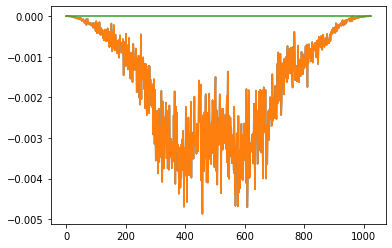

In [8]:
plt.plot(win_frame)
plt.plot(out_window_c_f32)
plt.plot(out_window_c * 2**(-15-Shift))
print(qsnr(out_window_c_f32, win_frame), qsnr(win_frame, out_window_c * 2**(-15-Shift)))

79


ValueError: operands could not be broadcast together with shapes (512,) (513,) 

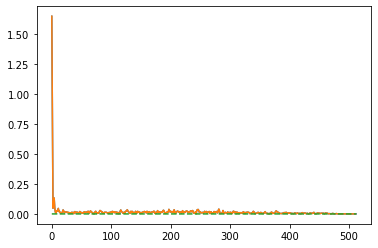

In [9]:
plt.plot(np.abs(np.fft.rfft(win_frame)))
plt.plot(np.abs(out_rfft_f32))
plt.plot(np.abs(out_rfft * 2**(-8-Shift)), "--")
print(qsnr(np.abs(np.fft.rfft(win_frame))[:-1], np.abs(out_rfft_f32)))
print(qsnr(np.abs(out_rfft_f32), np.abs(out_rfft * 2**(-8-Shift))))

In [10]:
out_rfft * 2**(-8-Shift)

array([-1.00580017e-04+0.00000000e+00j,  4.89633179e-05-4.20074463e-06j,
        2.98370361e-06+5.59497070e-06j, -6.31817627e-06-9.74548340e-07j,
        6.87420654e-06-2.08764648e-06j, -1.67877197e-06+1.01568604e-06j,
       -1.20428467e-06-4.30114746e-07j,  1.54754639e-06+1.40142822e-06j,
       -7.82470703e-07-1.08300781e-06j, -6.16455078e-08-3.39477539e-07j,
       -3.85681152e-07+1.32458496e-06j, -3.12194824e-07-2.16192627e-06j,
        1.20776367e-06+1.82653809e-06j, -6.89575195e-07-9.86938477e-08j,
        1.01623535e-07-7.13867187e-07j,  5.89843750e-07+6.58630371e-07j,
       -3.56445312e-07-5.34362793e-07j, -6.28051758e-08-3.31176758e-07j,
       -1.10351562e-06+1.55517578e-07j,  1.26788330e-06+2.10693359e-07j,
       -4.15039062e-09+1.23352051e-07j, -6.96716309e-07-2.25402832e-07j,
        1.02624512e-06+6.64184570e-07j, -1.06481934e-06-2.70507813e-07j,
        8.29223633e-07-1.05242920e-06j, -5.69885254e-07+1.18273926e-06j,
       -2.24487305e-07-7.50732422e-08j,  4.28466797